In [18]:
import pandas as pd
#df = pd.read_csv('profielen Elektriciteit 2016 versie 1.01.csv')
df = pd.read_excel('../data/NEDU-16-A1.xlsx')
print(df.head())
#df.tail()   v = E1A, V2 = averare all, V3 = Average HH, V4 = E1A share

                   Time     Value    Value2    Value3    Value4
0  01/01/2016  00,15,00  0.000040  0.000031  0.001034  0.003979
1  01/01/2016  00,30,00  0.000039  0.000031  0.001022  0.003865
2  01/01/2016  00,45,00  0.000037  0.000030  0.001012  0.003703
3  01/01/2016  01,00,00  0.000036  0.000030  0.001009  0.003563
4  01/01/2016  01,15,00  0.000034  0.000030  0.001000  0.003371


In [20]:
perjam = []
yy = 4
for xx in range (0, len(df), yy):
    jum = df['Value4'][xx:xx+yy].sum()
    perjam.append(jum)
    #print(zz)

In [ ]:
len(perjam)

In [21]:
#kumpulkan semua yang sama jam
per24 = []
dff = []
for yy in range (0,24):  # iterator jam 0 - 23
   
    per24.append(int(yy))
    for xx in range (0,8784):
        if xx % 24 == yy:      # yy jam ybs
            jum = perjam[xx]
            per24.append(jum)  # simpam setiap jam yang sama
            
    zz = per24.copy()
    dff.append(zz)
    per24.clear()

In [ ]:
#tulis perjam
datatgl = pd.DataFrame(dff).T
#dataMenit.to_csv('../hasil/hourly-liguria15X.csv', index=False, header=[ ' date','temp'])
datatgl.to_csv('../data/alpg_per24-Nedu.csv', header = 0, index=False)
datatgl.head()

In [22]:

dfff = []
jum = 0
for yy in range (0,24):
    for xx in range (0,8760):
        if xx % 24 == yy:  # 
            jum += perjam[xx]

    dfff.append(jum/365) # rata-rata
    jum = 0

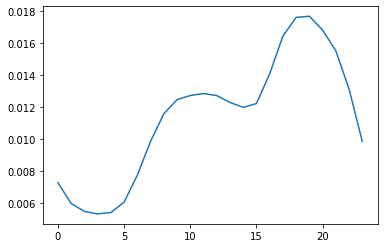

In [23]:
import matplotlib.pyplot as plt 
plt.plot(dfff)

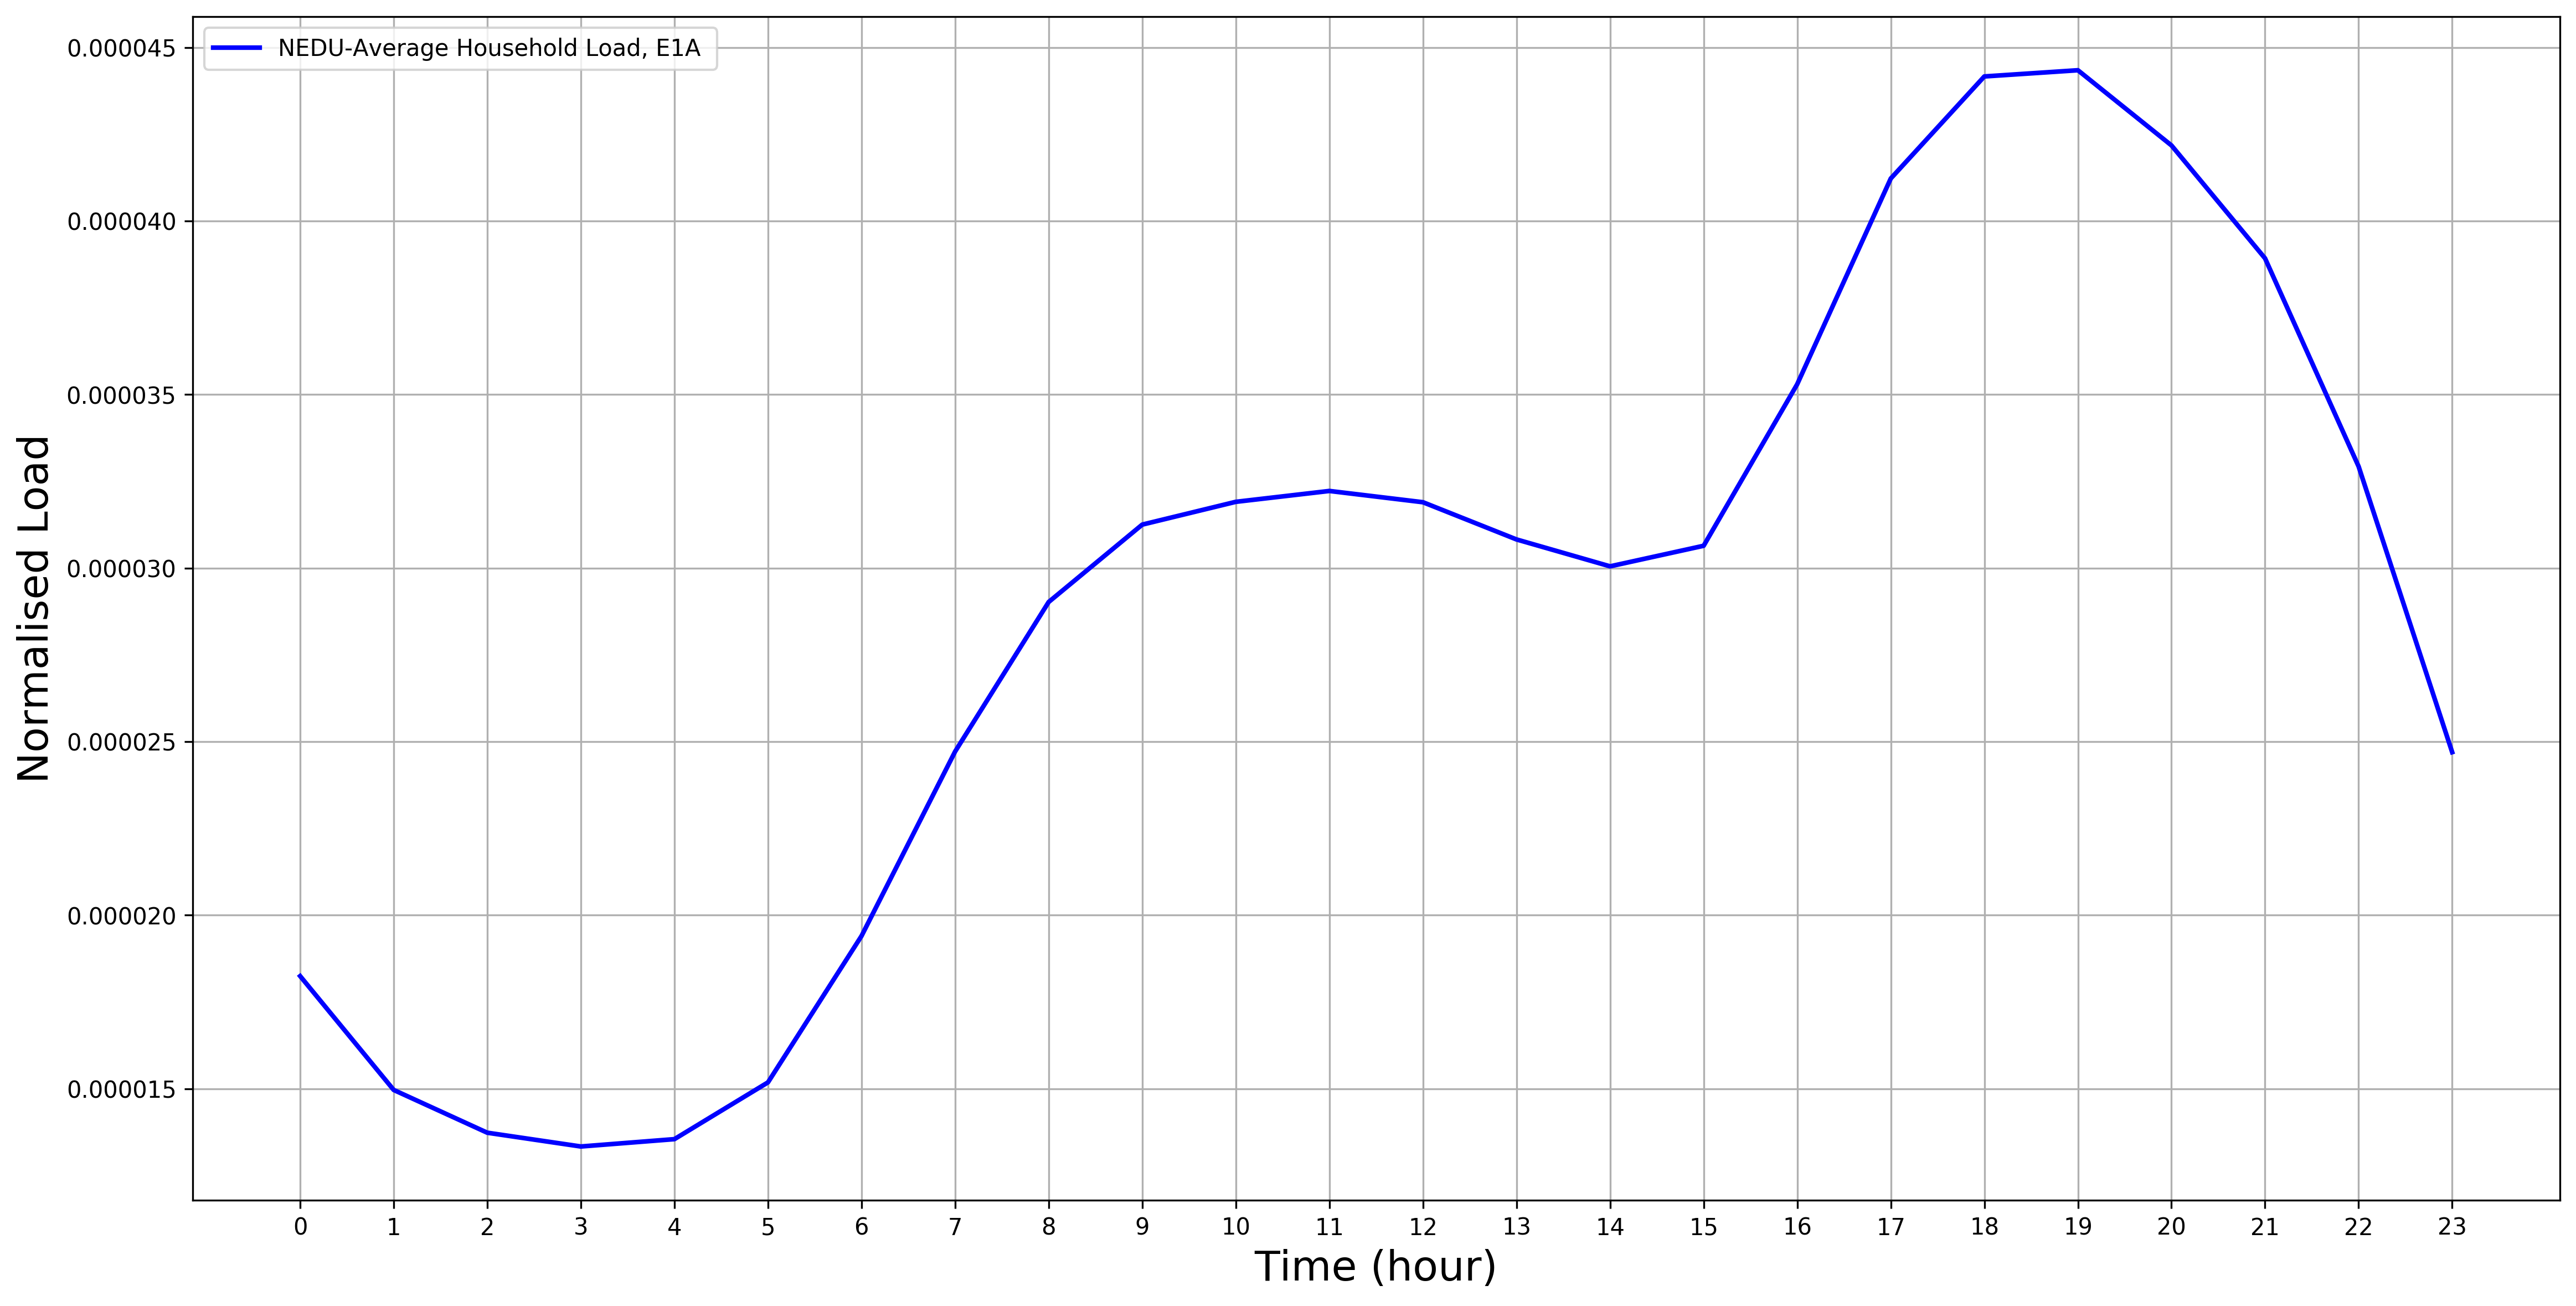

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,7.5), dpi=300)
fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)

plt.subplot(1,1,1)
plt.gca().grid(True)
plt.plot(dfff, color="blue", linewidth=2, label="NEDU-Average Household Load, E1A ")
#plt.plot(df.E1A*3500*4, color="blue", linewidth=2, label="NEDU-Average Household Load, E1A ")
plt.legend(loc='upper left', frameon=True)
plt.ylabel('Normalised Load', fontsize=18)    
plt.xlabel('Time (hour)', fontsize=18)
plt.xticks(range(24))
plt.tick_params(which='both',labelbottom=True)


plt.savefig('NEDU-E1A.png', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='legal', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.5)

plt.show()

['Unnamed: 0', 'Unnamed: 1', 'Versienr', '1.01_E1A', '1.01_E1B', '1.01_E1C', '1.01_E2A', '1.01_E2B', '1.01_E3A', '1.01_E3B', '1.01_E3C', '1.01_E3D', '1.01_E4A']


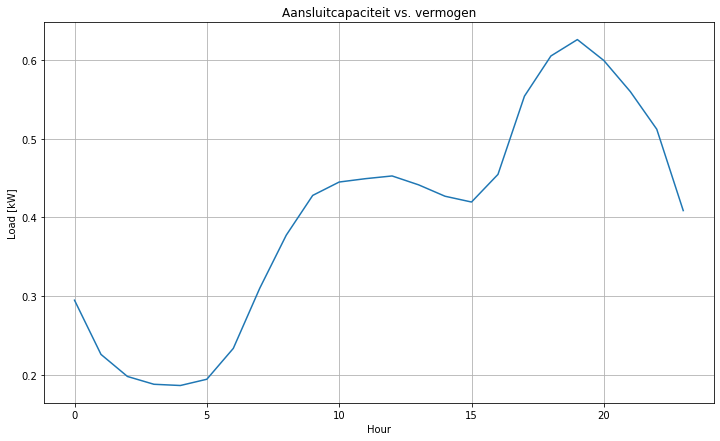

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 24 12:31:31 2020

@author: eklaasse
"""

#%% Load libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#%% Load data

df = pd.read_csv('../data/profielen Elektriciteit 2016 versie 1.01.csv')
print(df.columns.tolist())

df.columns = df.iloc[1,]
df = df.iloc[4:, ]
df.rename(columns = {np.nan:'Date'}, inplace = True) 
df = df.iloc[:,1:]

df.Date = pd.to_datetime(df.Date)
df['Hour'] = df.Date.dt.hour
df.Date = df.Date.dt.date

df.iloc[:,2:] = df.iloc[:,2:].apply(pd.to_numeric)
df = df.groupby(['Hour']).mean()

#%% Plot fig. 

fig, ax = plt.subplots(figsize=(12,7))
plt.plot(np.arange(0, df.shape[0]), df.E1A*3500*4)
ax.set_xlabel('Hour'); ax.set_ylabel('Load [kW]'); ax.set_title('Aansluitcapaciteit vs. vermogen')
ax.grid(); plt.axis('tight'); 
